## Load Packages

In [ ]:
from IPython.core.display import display, HTML
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer

# INSTALLATION
!python -m spacy download es_core_news_sm
import spacy

from configparser import ConfigParser, ExtendedInterpolation
from collections import defaultdict
from itertools import combinations, product
import warnings
warnings.filterwarnings('ignore')

import gensim
from gensim import corpora, models, similarities
from gensim.corpora import Dictionary
from gensim.matutils import kullback_leibler, hellinger
from gensim.models import ldamodel
from gensim.similarities import MatrixSimilarity, SparseMatrixSimilarity, Similarity
from gensim.summarization.bm25 import get_bm25_weights
from gensim.utils import simple_preprocess
from IPython.core.display import display, HTML
from IPython.display import Image
from IPython.lib.display import YouTubeVideo
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from spacy.matcher import Matcher
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import spacy

# increase display of columns in pandas
pd.set_option('display.max_colwidth', 200)

     |████████████████████████████████| 16.2MB 3.7MB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-cp36-none-any.whl size=16172934 sha256=52686618317d7e4d67b4cf565506a08a9655db793385baf57e47d9030ba7e8a8
  Stored in directory: /tmp/pip-ephem-wheel-cache-irry2awj/wheels/05/4f/66/9d0c806f86de08e8645d67996798c49e1512f9c3a250d74242
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


##Upload dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pd.set_option('display.max_colwidth', 200)
df = pd.read_csv("/content/drive/My Drive/clusters.csv")
df

## Data cleaning

Clean location data

In [ ]:
#drop locations which have numbers instead of states
df=df[~df['Location'].str.contains('\d')]

In [ ]:
#Change Location data to only show state abbreviations

df.loc[df.Location == 'alabama', 'Location'] = 'al'
df.loc[df.Location == 'alaska', 'Location'] = 'ak'
df.loc[df.Location == 'arizona', 'Location'] = 'az'
df.loc[df.Location == 'arkansas', 'Location'] = 'ar'
df.loc[df.Location == 'california', 'Location'] = 'ca'
df.loc[df.Location == 'colorado', 'Location'] = 'co'
df.loc[df.Location == 'connecticut', 'Location'] = 'ct'
df.loc[df.Location == 'delaware', 'Location'] = 'de'
df.loc[df.Location == 'florida', 'Location'] = 'fl'
df.loc[df.Location == 'georgia', 'Location'] = 'ga'
df.loc[df.Location == 'hawaii', 'Location'] = 'hi'
df.loc[df.Location == 'idaho', 'Location'] = 'id'
df.loc[df.Location == 'illinois', 'Location'] = 'il'
df.loc[df.Location == 'indiana', 'Location'] = 'in'
df.loc[df.Location == 'iowa', 'Location'] = 'ia'
df.loc[df.Location == 'kansas', 'Location'] = 'ks'
df.loc[df.Location == 'kentucky', 'Location'] = 'ky'
df.loc[df.Location == 'louisiana', 'Location'] = 'la'
df.loc[df.Location == 'maine', 'Location'] = 'me'
df.loc[df.Location == 'maryland', 'Location'] = 'md'
df.loc[df.Location == 'massachusetts', 'Location'] = 'ma'
df.loc[df.Location == 'michigan', 'Location'] = 'mi'
df.loc[df.Location == 'minnesota', 'Location'] = 'mn'
df.loc[df.Location == 'mississippi', 'Location'] = 'ms'
df.loc[df.Location == 'missouri', 'Location'] = 'mo'
df.loc[df.Location == 'montana', 'Location'] = 'mt'
df.loc[df.Location == 'nebraska', 'Location'] = 'ne'
df.loc[df.Location == 'nevada', 'Location'] = 'nv'
df.loc[df.Location == 'new hampshire', 'Location'] = 'nh'
df.loc[df.Location == 'new jersey', 'Location'] = 'nj'
df.loc[df.Location == 'new mexico', 'Location'] = 'nm'
df.loc[df.Location == 'new york', 'Location'] = 'ny'
df.loc[df.Location == 'north carolina', 'Location'] = 'nc'
df.loc[df.Location == 'north dakota', 'Location'] = 'nd'
df.loc[df.Location == 'ohio', 'Location'] = 'oh'
df.loc[df.Location == 'oklahoma', 'Location'] = 'ok'
df.loc[df.Location == 'oregon', 'Location'] = 'or'
df.loc[df.Location == 'pennsylvania', 'Location'] = 'pa'
df.loc[df.Location == 'rhode island', 'Location'] = 'ri'
df.loc[df.Location == 'south carolina', 'Location'] = 'sc'
df.loc[df.Location == 'south dakota', 'Location'] = 'sd'
df.loc[df.Location == 'tennessee', 'Location'] = 'tn'
df.loc[df.Location == 'texas', 'Location'] = 'tx'
df.loc[df.Location == 'utah', 'Location'] = 'ut'
df.loc[df.Location == 'vermont', 'Location'] = 'vt'
df.loc[df.Location == 'virginia', 'Location'] = 'vi'
df.loc[df.Location == 'washington', 'Location'] = 'wa'
df.loc[df.Location == 'west virginia', 'Location'] = 'wv'
df.loc[df.Location == 'wisconsin', 'Location'] = 'wi'
df.loc[df.Location == 'wyoming', 'Location'] = 'wy'
df.loc[df.Location == 'palau', 'Location'] = 'pw'
df.loc[df.Location == 'guam', 'Location'] = 'gu'
df.loc[df.Location == 'american samoa', 'Location'] = 'as'

Delete duplicate tweets and retweets

In [ ]:
df = tweets.drop_duplicates(subset=['Processed_Tweet'])

## Sentiment Analysis

In [ ]:
#load cleaned dataset
df=pd.read_csv(#insert dataset path)

In [ ]:
# create a function to pass our sentences
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    return score

In [ ]:
df['score'] = df['Processed_Tweet'].apply(lambda review: sentiment_analyzer_scores(review)['compound'])
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Location,Processed_Tweet,score
0,7.968997e+17,tx,bet tyrannical dem governor end covid stay hom...,0.0000
1,1.143848e+09,nc,"accord ons , 40,000 uk die coronavirus . doubl...",-0.5994
2,9.555381e+17,nc,try .. editorial leftist editorial board convi...,0.0258
3,3.707619e+07,tn,"careful . crazy nancy total disaster , usa com...",-0.7569
4,2.742637e+08,ny,"fuck mitch , putin puppet ! make donation ...",-0.4184


In [ ]:
#classify in positive, neutral or negative tweets
df['sentiment'] = df['score'].apply(lambda c: 1 if c >=0.05 else (0 if c > -0.05 else -1))

df.head(20)

In [ ]:
# get the overall opinion of each person
personalOpinion = new_data_set.groupby(['ID','Location'],as_index=False).mean()
personalOpinion.head()

,ID,Location,sentiment
0,17.0,ny,0.000000
1,76.0,mo,1.000000
2,291.0,mo,-0.166667
3,364.0,ma,0.000000
4,422.0,ca,-1.000000


In [ ]:
personalOpinion.drop(columns='ID', inplace= True)
personalOpinion.head()

,Location,Final_Attitude
0,ny,0
1,mo,1
2,mo,-1
3,ma,0
4,ca,-1


In [ ]:
states = personalOpinion.groupby(by = 'Location', as_index= False).mean()
sorted_states = states.sort_values(by = 'Final_Attitude')

In [ ]:
sorted_states

,Location,Final_Attitude
43,pr,0.035382
49,tx,0.038726
29,ms,0.040672
37,nv,0.049772
13,hi,0.050896
20,la,0.053811
57,wy,0.059075
4,az,0.067017
35,nj,0.069214
36,nm,0.074714


best: ri> north Dakota > new hampshire > vermont > Nebraska > Virginia

worst: texas > Mississippi > Nevada > Hawaii > Los Angeles

mh is marshial island, not a state. mp is an island fm is an island as is an island

## Clustering Analysis

Use cleaned dataset

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorize the text
Tweets= df['Processed_Tweet'].tolist()
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=50) # ADD bi-grams
X = vectorizer.fit_transform(Tweets)
print('Model fit')

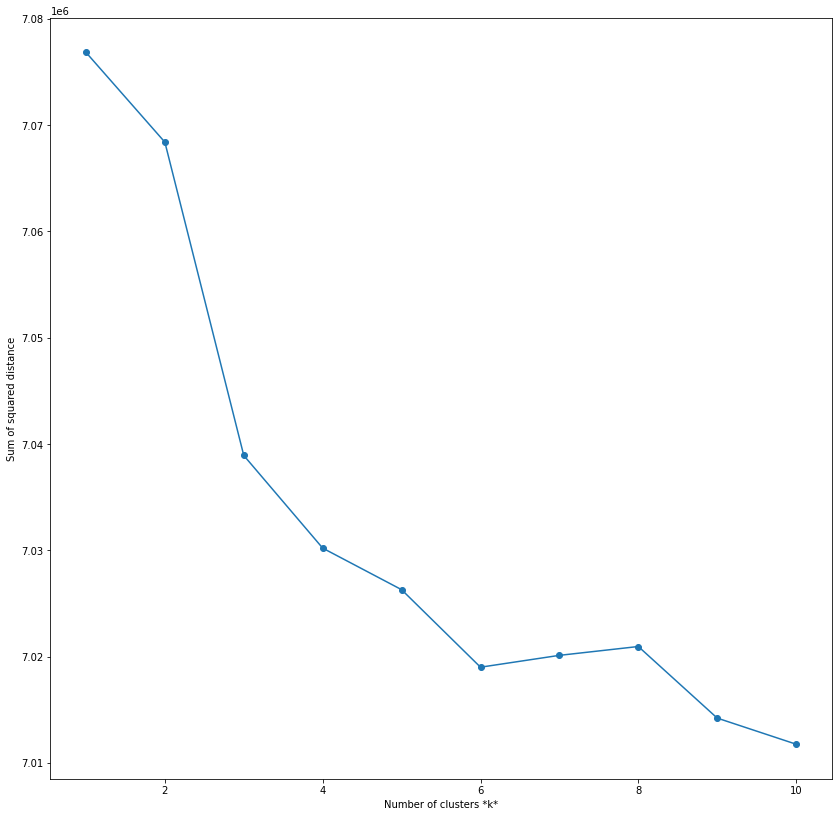

In [ ]:
#determine the optimal number of clusters

sse = []
list_k = list(range(1, 11))

for k in list_k:
    km = MiniBatchKMeans(n_clusters=k, batch_size=200, random_state=3)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(14, 14))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.show()

According to the elbow technique the optimal number of clusters is 6

In [ ]:
# cluster the document using KMeans

# step 1 - import the model
from sklearn.cluster import KMeans, MiniBatchKMeans

# step 2 - instantiate the model
km = MiniBatchKMeans(n_clusters=6, batch_size=200, random_state=3)

# step 3 - fit the model with data
km.fit(X)

# step 4 - predict the cluster of each section_title
df1['clusters'] = km.predict(X)

In [ ]:
#print clusters
def review_clusters(df1, n_clusters):
    for cl_num in range(n_clusters):
        print(cl_num)
        print(df1[df1.clusters == cl_num]['Processed_Tweet'].values[0:25])
        print()

review_clusters(df1, n_clusters=6)

0
['# howtoend_coronapandemiconly saint rampal ji maharaj save world terrible disease like corona philosophy'
 'niggas move like covid real thing anymore'
 'chromatica report single case covid-19 . true leadership look like .'
 'genovia report single case covid-19 . true leadership look like .'
 'joe like corona ur sexy ahaha lemme sniff hair'
 'discover cure corona , need cure 😷 : " like like ; like like " .'
 'right like “ trust china number ! ! ! ” totally correct well argument …'
 'outbreak corona have u see like “ sick 😷 need ur prayer “'
 'irritate ? ? like find funny . .'
 "india fight corona!cows pee & amp ; medium group criminal modi's!so govt like rem …"
 'predatory cult lead waste human flesh look like . people like thank god atheist .'
 'raab like rabbit headlight . starmer cool&amp;calm pull piece # test # carehomes # coronavirus # pmqs'
 'like formula movie . fundos , gun , rogue general throw screw childhood corrupt …'
 ', inside govts & amp ; company , say ‘ ! ’ people 

In [ ]:
import string
punct = set(string.punctuation)

#choose cluster to analyze
raw_docs = df[df['clusters']==0].Processed_Tweet

#get rid of punctuation
raw_docs=''.join(ch for ch in raw_docs if ch not in punct)
raw_docs=''.join(ch for ch in raw_docs if ch not in punct)
raw_docs

In [ ]:
raw_docs = raw_docs.split() 

In [ ]:
from collections import Counter 

list=Counter(raw_docs).most_common(50)
pd.DataFrame(list)

,0,1
0,covid,424761
1,corona,311860
2,people,256330
3,amp,225746
4,time,141986
5,need,133317
6,work,131424
7,go,126833
8,say,117134
9,death,115985


Repeat last 3 cells for each cluster

Sentiment of each cluster

In [ ]:
#load dataset with clusters first

In [ ]:
# create a function to pass our sentences
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    return score

In [ ]:
df['score'] = df['Processed_Tweet'].apply(lambda review: sentiment_analyzer_scores(review)['compound'])

In [ ]:
#classify each tweet in very negative, negative, neutral, positive and very positive

df['Sentiment'] = df['score'].apply(lambda c: 'very_pos' if c >=0.5 else ('pos' if c > 0.05 else ('neu' if c > -0.05 else ('neg' if c > -0.5 else 'very_neg'))))

In [ ]:
#create dummies
df=pd.get_dummies(df, columns=['Sentiment'])
df

In [ ]:
#aggregate by clusters

clusters = df.groupby('clusters').agg({'score':'mean','Processed_Tweet':'count','Sentiment_very_pos':'mean','Sentiment_pos':'mean','Sentiment_neu':'mean', 'Sentiment_neg':'mean','Sentiment_very_neg':'mean'}).rename(columns={'score': 'mean_score','Processed_Tweet':'Number_of_Tweets','Sentiment_very_pos':'Percentage of very positive tweets','Sentiment_pos':'Percentage of positive tweets','Sentiment_neu':'Percentage of neutral tweets','Sentiment_neg':'Percentage of negative tweets','Sentiment_very_neg':'Percentage of very negative tweets' }).reset_index()


In [ ]:
clusters

,clusters,mean_score,Number_of_Tweets,Percentage of very positive tweets,Percentage of positive tweets,Percentage of neutral tweets,Percentage of negative tweets,Percentage of very negative tweets
0,0,0.232116,261132,0.353572,0.335941,0.030268,0.151242,0.128977
1,1,0.034531,3173441,0.206412,0.206352,0.241596,0.161012,0.184628
2,2,0.007331,1075784,0.185103,0.201389,0.254902,0.164281,0.194325
3,3,-0.024512,932454,0.162353,0.187536,0.265861,0.174115,0.210135
4,4,-0.065677,933422,0.131251,0.188264,0.263778,0.192508,0.224199
5,5,0.065003,743329,0.227034,0.216300,0.233670,0.150329,0.172666


## Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:


df=pd.read_csv('/content/drive/My Drive/data/Drop_Retweets.csv')
#take only""Processed_Tweet" Col
df_tweet=df['Processed_Tweet']

In [ ]:
df_str = df_tweet.to_list()
r_tweet = " ".join(df_str)

In [ ]:
#writing tweets in string into empty text file
text_file = open("tweets_string.txt", "w")
n = text_file.write(r_tweet)
text_file.close()

Generating WordCloud across 611165721 characters.
WordCloud generated and displaying...


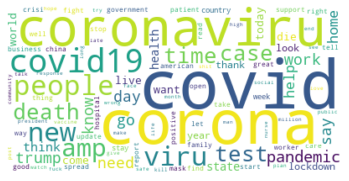

CPU times: user 2min 6s, sys: 5.71 s, total: 2min 11s
Wall time: 2min 11s


In [ ]:
# Create a basic wordcloud
print(f'Generating WordCloud across {len(r_tweet)} characters.')
wordcloud = WordCloud(background_color="white", collocations=False, max_words=100,max_font_size=80).generate(r_tweet)
print('WordCloud generated and displaying...')
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()